In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Importing dataset

In [27]:
df=pd.read_excel('table.xlsx')
df.head()

,player,cls,year,gp,mpg,ppg,fgm,fga,fg%,3pm,...,orb,drb,rpg,apg,spg,bpg,tov,pf,draft_pos,drafted
0,Craig Smith,Fr,2003,31,31.9,19.9,7.8,12.9,0.603,0.1,...,3.2,4.7,7.9,1.3,0.9,0.9,2.4,3.4,6.0,second round
1,Ike Diogu,Fr,2003,32,32.2,19.0,6.6,10.8,0.609,0.3,...,3.1,4.8,7.8,0.8,0.3,1.0,2.8,2.9,9.0,first round
2,Rashad McCants,Fr,2003,35,29.9,17.0,6.2,12.5,0.493,2.1,...,1.9,3.0,4.9,1.5,1.4,0.5,2.3,2.7,14.0,first round
3,Bracey Wright,Fr,2003,30,33.6,16.2,5.2,12.1,0.433,2.2,...,1.4,3.6,5.0,2.1,0.8,0.6,2.1,2.0,17.0,second round
4,J.J. Redick,Fr,2003,33,30.7,15.0,4.5,10.9,0.413,2.9,...,0.6,1.9,2.5,2.0,1.2,0.1,1.6,1.7,11.0,first round


Filling null values in drafted column as undrafted

In [28]:
df['drafted'].isnull().value_counts()

True     7038
False     889
Name: drafted, dtype: int64

In [29]:
df['drafted'].fillna('undrafted',inplace=True)

In [30]:
df['drafted'].isnull().value_counts()

False    7927
Name: drafted, dtype: int64

In [31]:
df.head()

,player,cls,year,gp,mpg,ppg,fgm,fga,fg%,3pm,...,orb,drb,rpg,apg,spg,bpg,tov,pf,draft_pos,drafted
0,Craig Smith,Fr,2003,31,31.9,19.9,7.8,12.9,0.603,0.1,...,3.2,4.7,7.9,1.3,0.9,0.9,2.4,3.4,6.0,second round
1,Ike Diogu,Fr,2003,32,32.2,19.0,6.6,10.8,0.609,0.3,...,3.1,4.8,7.8,0.8,0.3,1.0,2.8,2.9,9.0,first round
2,Rashad McCants,Fr,2003,35,29.9,17.0,6.2,12.5,0.493,2.1,...,1.9,3.0,4.9,1.5,1.4,0.5,2.3,2.7,14.0,first round
3,Bracey Wright,Fr,2003,30,33.6,16.2,5.2,12.1,0.433,2.2,...,1.4,3.6,5.0,2.1,0.8,0.6,2.1,2.0,17.0,second round
4,J.J. Redick,Fr,2003,33,30.7,15.0,4.5,10.9,0.413,2.9,...,0.6,1.9,2.5,2.0,1.2,0.1,1.6,1.7,11.0,first round


In [32]:
df.drop(['year','draft_pos'],axis='columns',inplace=True)
df

,player,cls,gp,mpg,ppg,fgm,fga,fg%,3pm,3pa,...,ft%,orb,drb,rpg,apg,spg,bpg,tov,pf,drafted
0,Craig Smith,Fr,31,31.9,19.9,7.8,12.9,0.603,0.1,0.5,...,0.677,3.2,4.7,7.9,1.3,0.9,0.9,2.4,3.4,second round
1,Ike Diogu,Fr,32,32.2,19.0,6.6,10.8,0.609,0.3,0.8,...,0.735,3.1,4.8,7.8,0.8,0.3,1.0,2.8,2.9,first round
2,Rashad McCants,Fr,35,29.9,17.0,6.2,12.5,0.493,2.1,5.0,...,0.697,1.9,3.0,4.9,1.5,1.4,0.5,2.3,2.7,first round
3,Bracey Wright,Fr,30,33.6,16.2,5.2,12.1,0.433,2.2,5.9,...,0.752,1.4,3.6,5.0,2.1,0.8,0.6,2.1,2.0,second round
4,J.J. Redick,Fr,33,30.7,15.0,4.5,10.9,0.413,2.9,7.2,...,0.919,0.6,1.9,2.5,2.0,1.2,0.1,1.6,1.7,first round
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,David Roddy,Jr,31,32.9,19.2,7.2,12.5,0.571,1.5,3.4,...,0.691,1.8,5.7,7.5,2.9,1.2,1.1,2.3,2.3,first round
7923,Cam Whitmore,Fr,26,27.3,12.5,4.7,9.8,0.478,1.4,4.2,...,0.703,0.8,4.5,5.3,0.7,1.4,0.3,1.6,1.7,first round
7924,Aaron Gray,So,31,32.5,12.4,4.4,10.2,0.430,1.6,4.9,...,0.735,1.0,3.5,4.5,1.1,0.6,0.3,1.1,2.3,second round
7925,Jaylen Clark,Jr,30,30.5,13.0,4.9,10.3,0.481,0.9,2.6,...,0.698,1.9,4.1,6.0,1.9,2.6,0.3,1.2,2.1,second round


<AxesSubplot:xlabel='drafted', ylabel='ppg'>

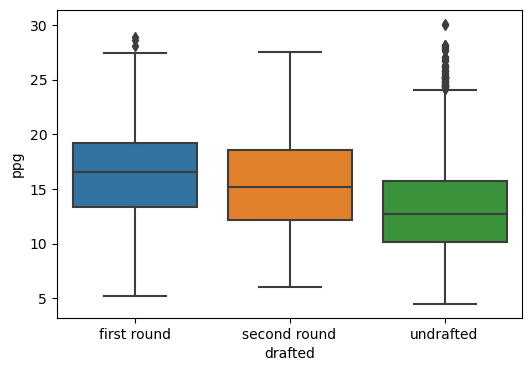

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='drafted',y='ppg',order=['first round','second round','undrafted'])

<AxesSubplot:xlabel='cls'>

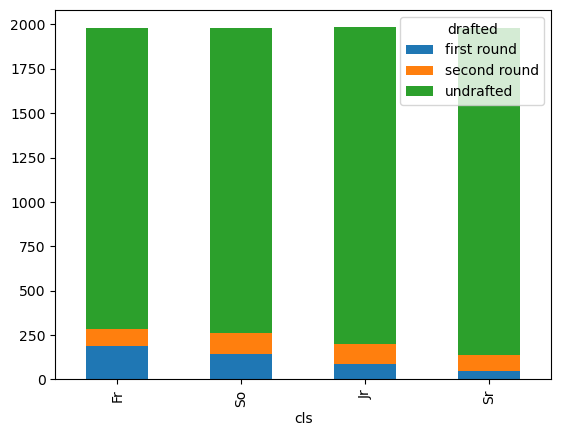

In [94]:
a=df[['cls','drafted']].groupby(by=['cls','drafted'])['cls'].count()
a.unstack().reindex(['Fr','So','Jr','Sr']).plot(kind='bar',stacked=True)

In [95]:
df.columns

Index(['player', 'cls', 'gp', 'mpg', 'ppg', 'fgm', 'fga', 'fg%', '3pm', '3pa',
       '3p%', 'ftm', 'fta', 'ft%', 'orb', 'drb', 'rpg', 'apg', 'spg', 'bpg',
       'tov', 'pf', 'drafted'],
      dtype='object')

<AxesSubplot:xlabel='drafted', ylabel='fg%'>

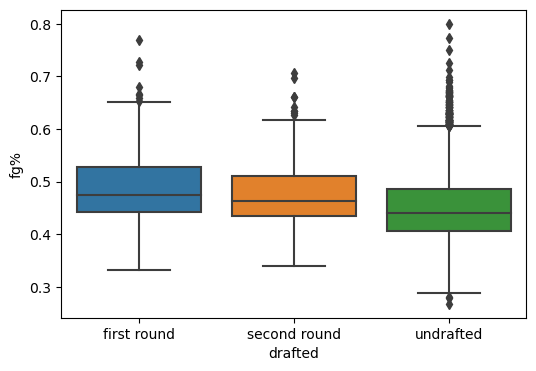

In [133]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='drafted',y='fg%',order=['first round','second round','undrafted'])

In [115]:
df[['drafted','fg%']].groupby('drafted')['fg%'].mean()

drafted
first round     0.487912
second round    0.476172
undrafted       0.450200
Name: fg%, dtype: float64

<AxesSubplot:xlabel='drafted', ylabel='3p%'>

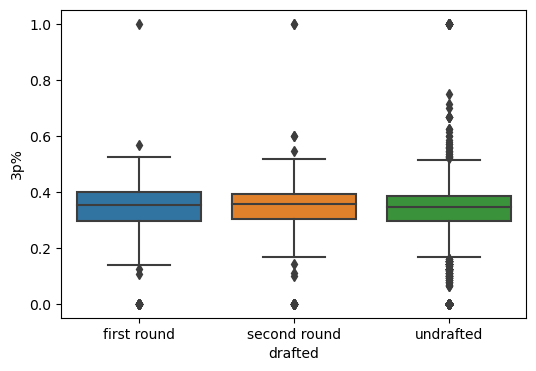

In [137]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='drafted',y='3p%',order=['first round','second round','undrafted'])

In [116]:
df[['drafted','3p%']].groupby('drafted')['3p%'].mean()

drafted
first round     0.322302
second round    0.329005
undrafted       0.320331
Name: 3p%, dtype: float64

<AxesSubplot:>

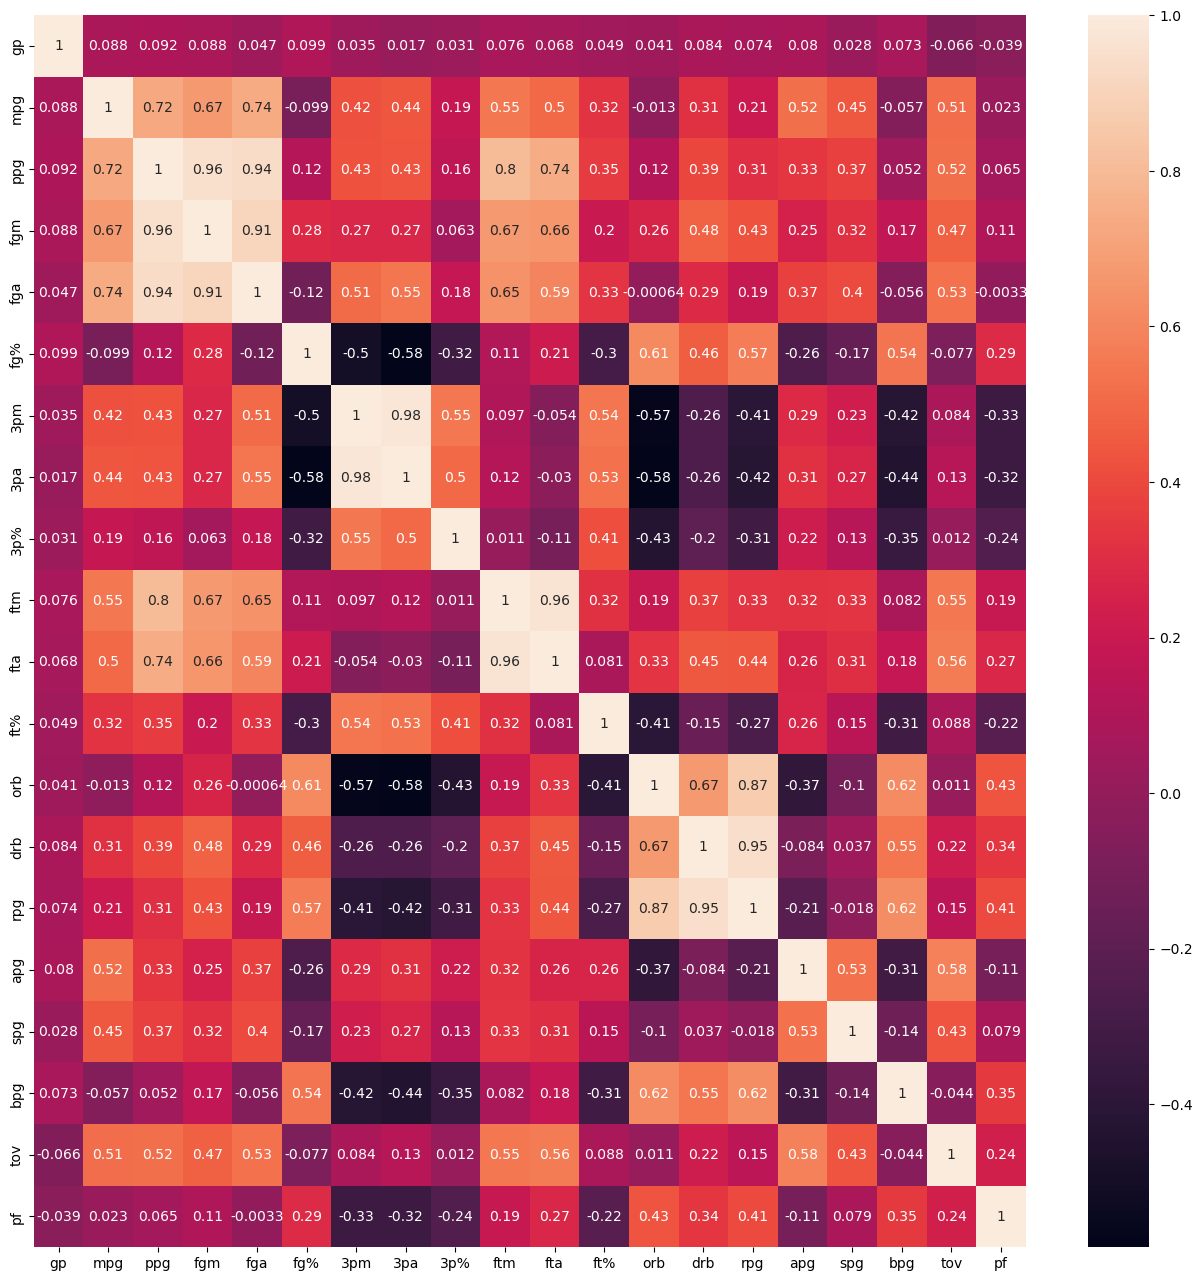

In [142]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True)

### Model

In [147]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

making class a dummy variable

In [143]:
df=pd.get_dummies(df,columns=['cls'])
df

,player,gp,mpg,ppg,fgm,fga,fg%,3pm,3pa,3p%,...,apg,spg,bpg,tov,pf,drafted,cls_Fr,cls_Jr,cls_So,cls_Sr
0,Craig Smith,31,31.9,19.9,7.8,12.9,0.603,0.1,0.5,0.200,...,1.3,0.9,0.9,2.4,3.4,second round,1,0,0,0
1,Ike Diogu,32,32.2,19.0,6.6,10.8,0.609,0.3,0.8,0.375,...,0.8,0.3,1.0,2.8,2.9,first round,1,0,0,0
2,Rashad McCants,35,29.9,17.0,6.2,12.5,0.493,2.1,5.0,0.414,...,1.5,1.4,0.5,2.3,2.7,first round,1,0,0,0
3,Bracey Wright,30,33.6,16.2,5.2,12.1,0.433,2.2,5.9,0.375,...,2.1,0.8,0.6,2.1,2.0,second round,1,0,0,0
4,J.J. Redick,33,30.7,15.0,4.5,10.9,0.413,2.9,7.2,0.399,...,2.0,1.2,0.1,1.6,1.7,first round,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,David Roddy,31,32.9,19.2,7.2,12.5,0.571,1.5,3.4,0.438,...,2.9,1.2,1.1,2.3,2.3,first round,0,1,0,0
7923,Cam Whitmore,26,27.3,12.5,4.7,9.8,0.478,1.4,4.2,0.343,...,0.7,1.4,0.3,1.6,1.7,first round,1,0,0,0
7924,Aaron Gray,31,32.5,12.4,4.4,10.2,0.430,1.6,4.9,0.331,...,1.1,0.6,0.3,1.1,2.3,second round,0,0,1,0
7925,Jaylen Clark,30,30.5,13.0,4.9,10.3,0.481,0.9,2.6,0.329,...,1.9,2.6,0.3,1.2,2.1,second round,0,1,0,0
